# CUDA Quantum hello-world 

In [4]:
import cudaq

In [5]:
cudaq.num_available_gpus()

AttributeError: module 'cudaq' has no attribute 'num_available_gpus'

In [1]:
import cudaq

In [2]:
# We begin by defining the `Kernel` that we will construct our
# program with.
kernel = cudaq.make_kernel()

# Next, we can allocate qubits to the kernel via `qalloc(qubit_count)`.
# An empty call to `qalloc` will return a single qubit.
qubit = kernel.qalloc()

# Now we can begin adding instructions to apply to this qubit!
# Here we'll just add every non-parameterized
# single qubit gate that is supported by CUDA Quantum.
kernel.h(qubit)
kernel.x(qubit)
kernel.y(qubit)
kernel.z(qubit)
kernel.t(qubit)
kernel.s(qubit)

# Next, we add a measurement to the kernel so that we can sample
# the measurement results on our simulator!
kernel.mz(qubit)

# Finally, we can execute this kernel on the state vector simulator
# by calling `cudaq.sample`. This will execute the provided kernel
# `shots_count` number of times and return the sampled distribution
# as a `cudaq.SampleResult` dictionary.
result = cudaq.sample(kernel)

# Now let's take a look at the `SampleResult` we've gotten back!
print(result)  # or result.dump()


{ 0:514 1:486 }



# Running kernels on IonQ’s backends.

In [6]:
import os

os.environ["IONQ_API_KEY"] = "0GMB7N19ksVxpNcIb5pQPgimo7Ssq9g3"


In [8]:
import cudaq

# You only have to set the target once! No need to redefine it
# for every execution call on your kernel.
# To use different targets in the same file, you must update
# it via another call to `cudaq.set_target()`
cudaq.set_target("ionq")

# Create the kernel we'd like to execute on IonQ.
kernel = cudaq.make_kernel()
qubits = kernel.qalloc(2)
kernel.h(qubits[0])
kernel.cx(qubits[0], qubits[1])

# Note: All qubits will be measured at the end upon performing
# the sampling. You may encounter a pre-flight error on IonQ
# backends if you include explicit measurements.

# Execute on IonQ and print out the results.

# Option A:
# By using the asynchronous `cudaq.sample_async`, the remaining
# classical code will be executed while the job is being handled
# by IonQ. This is ideal when submitting via a queue over
# the cloud.
async_results = cudaq.sample_async(kernel)
# ... more classical code to run ...

# We can either retrieve the results later in the program with
# ```
# async_counts = async_results.get()
# ```
# or wee can also write the job reference (`async_results`) to
# a file and load it later or from a different process.
file = open("future.txt", "w")
file.write(str(async_results))
file.close()

# We can later read the file content and retrieve the job
# information and results.
same_file = open("future.txt", "r")
retrieved_async_results = cudaq.AsyncSampleResult(str(same_file.read()))

counts = retrieved_async_results.get()
print(counts)

# Option B:
# By using the synchronous `cudaq.sample`, the execution of
# any remaining classical code in the file will occur only
# after the job has been returned from IonQ.
counts = cudaq.sample(kernel)
print(counts)



{ 3:50 0:50 }

{ 3:50 0:50 }



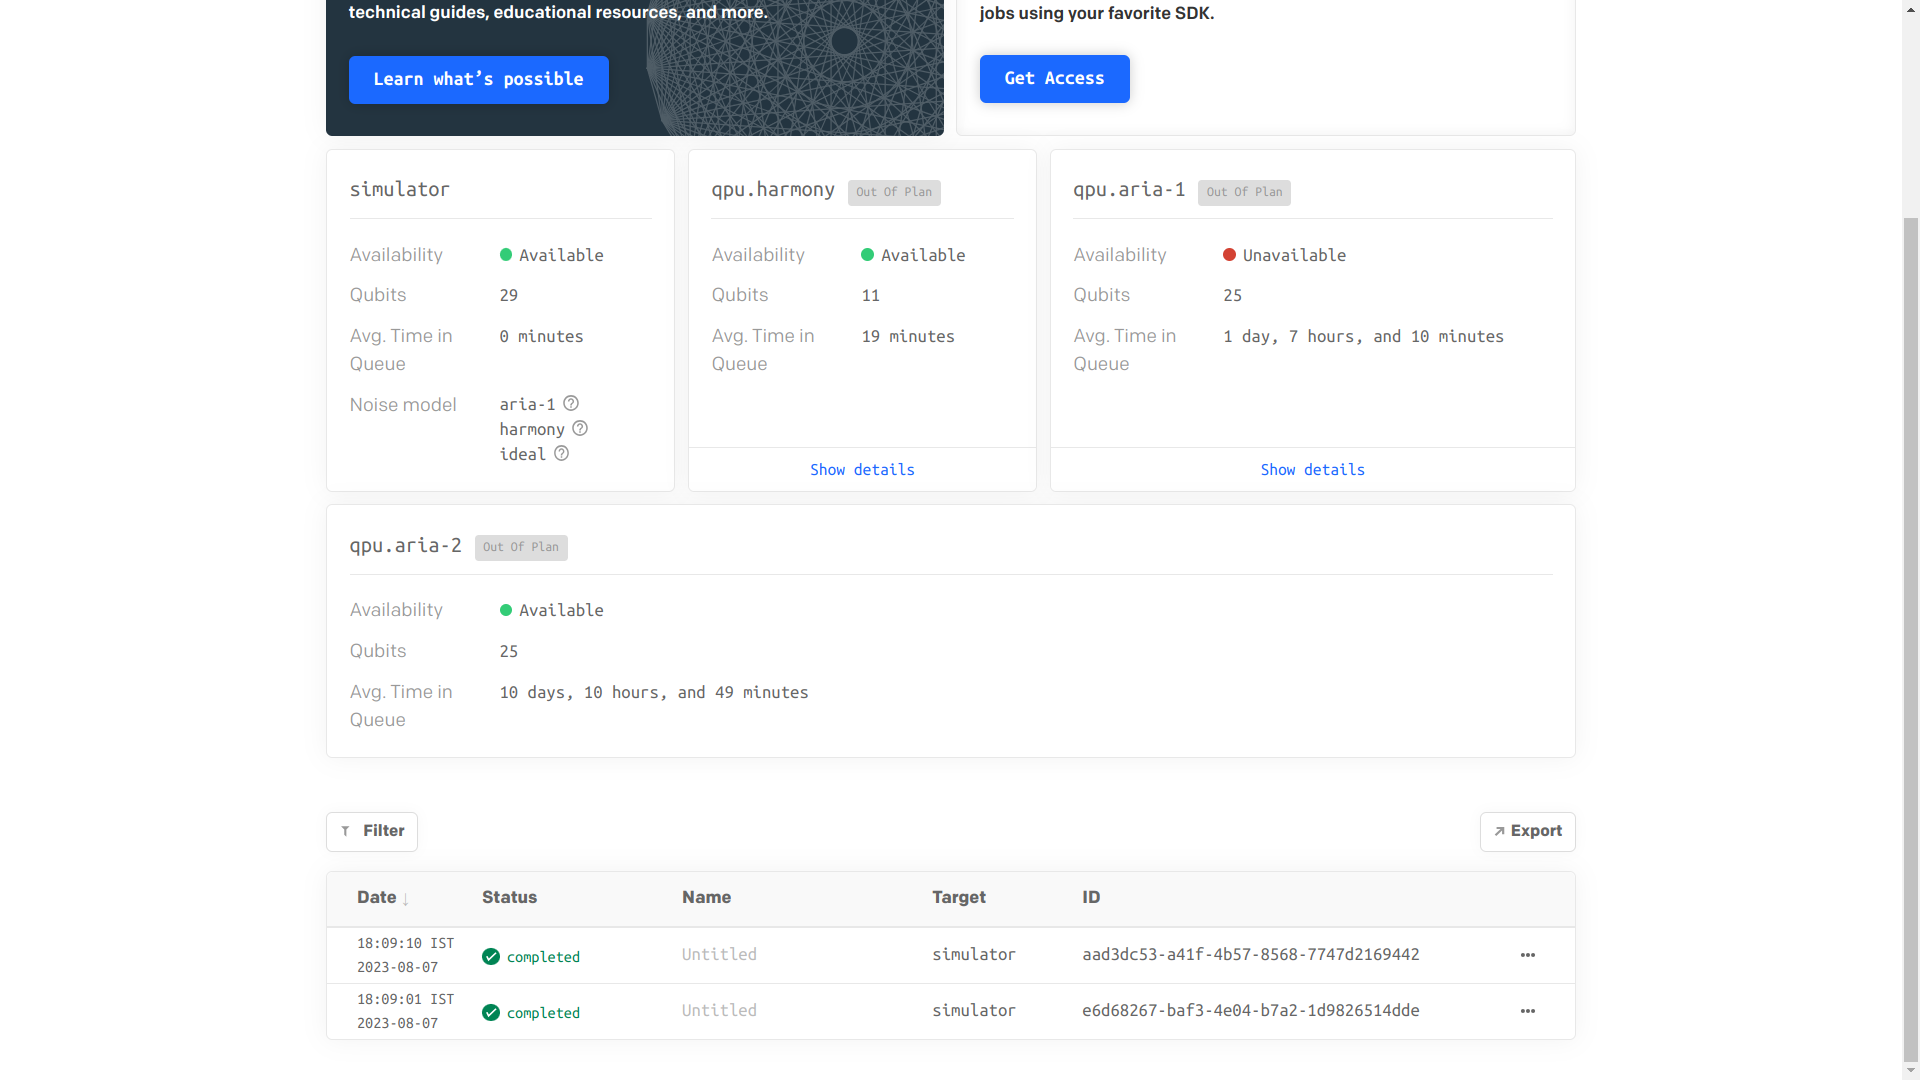

# Running kernels on Quantinuum’s backends

In [ ]:
import cudaq

# You only have to set the target once! No need to redefine it
# for every execution call on your kernel.
# By default, we will submit to the Quantinuum syntax checker.
cudaq.set_target("quantinuum")

# Create the kernel we'd like to execute on Quantinuum.
kernel = cudaq.make_kernel()
qubits = kernel.qalloc(2)
kernel.h(qubits[0])
kernel.cx(qubits[0], qubits[1])
kernel.mz(qubits[0])
kernel.mz(qubits[1])

# Submit to Quantinuum's endpoint and confirm the program is valid.

# Option A:
# By using the synchronous `cudaq.sample`, the execution of
# any remaining classical code in the file will occur only
# after the job has been executed by the Quantinuum service.
# We will use the synchronous call to submit to the syntax
# checker to confirm the validity of the program.
syntax_check = cudaq.sample(kernel)
if (syntax_check):
    print("Syntax check passed! Kernel is ready for submission.")

# Now we can update the target to the Quantinuum emulator and
# execute our program.
cudaq.set_target("quantinuum", machine="H1-2E")

# Option B:
# By using the asynchronous `cudaq.sample_async`, the remaining
# classical code will be executed while the job is being handled
# by Quantinuum. This is ideal when submitting via a queue over
# the cloud.
async_results = cudaq.sample_async(kernel)
# ... more classical code to run ...

# We can either retrieve the results later in the program with
# ```
# async_counts = async_results.get()
# ```
# or wee can also write the job reference (`async_results`) to
# a file and load it later or from a different process.
file = open("future.txt", "w")
file.write(str(async_results))
file.close()

# We can later read the file content and retrieve the job
# information and results.
same_file = open("future.txt", "r")
retrieved_async_results = cudaq.AsyncSampleResult(str(same_file.read()))

counts = retrieved_async_results.get()
print(counts)